In [1]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv("50_Startups.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
dataset.shape

(50, 5)

In [4]:
dataset.columns


Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

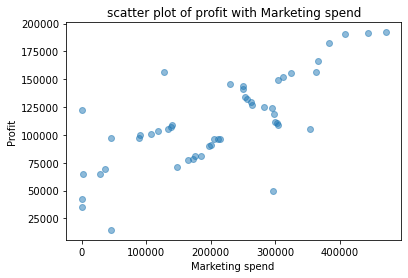

In [5]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha=0.5)
plt.title("scatter plot of profit with Marketing spend")
plt.xlabel("Marketing spend ")
plt.ylabel("Profit")
plt.show()

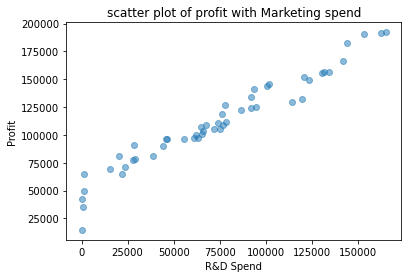

In [25]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha=0.5)
plt.title("scatter plot of profit with Marketing spend")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()

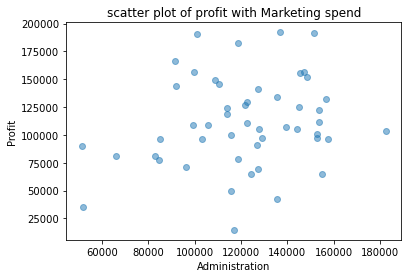

In [24]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.5)
plt.title("scatter plot of profit with Marketing spend")
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.show()

Text(0.5, 0, 'Profit')

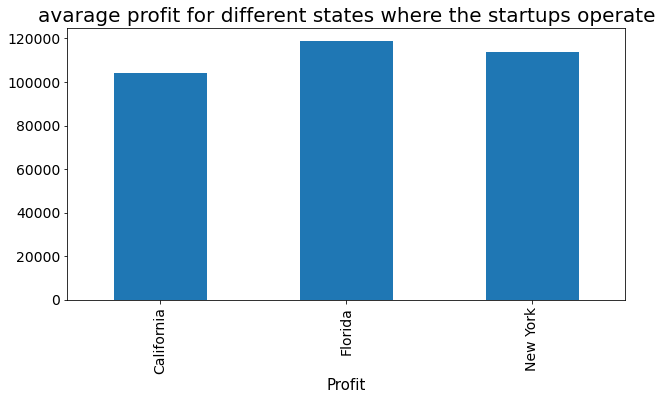

In [8]:
ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(
    figsize=(10,5),
    fontsize=14
)

# set the title
ax.set_title("avarage profit for different states where the startups operate", fontsize=20)
# set x and y-labels
ax.set_xlabel("State",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 15)

In [9]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [10]:
new_data = pd.get_dummies(dataset)
new_data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [11]:
dependent_variables  ="Profit"

In [12]:
independent_variables = new_data.columns.tolist()

In [13]:
independent_variables.remove(dependent_variables)

In [14]:
independent_variables

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'State_California',
 'State_Florida',
 'State_New York']

In [15]:
# create the independent variable
x = new_data[independent_variables].values
# create the dependent variable
y = new_data[dependent_variables].values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2, random_state=2)

In [18]:
# transforming data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [19]:
x_train[0:10]

array([[0.4738321 , 0.4510652 , 0.31668231, 0.        , 0.        ,
        1.        ],
       [0.00333369, 0.00432296, 0.        , 0.        , 0.        ,
        1.        ],
       [0.58215559, 0.88143739, 0.63657411, 0.        , 0.        ,
        1.        ],
       [0.577276  , 0.71456332, 0.56283007, 0.        , 1.        ,
        0.        ],
       [0.44347245, 0.71967718, 0.79564086, 0.        , 0.        ,
        1.        ],
       [0.34129603, 0.48655174, 0.48352224, 0.        , 1.        ,
        0.        ],
       [0.47979221, 0.66078277, 0.5955101 , 1.        , 0.        ,
        0.        ],
       [0.94368807, 0.4685842 , 0.91898151, 0.        , 1.        ,
        0.        ],
       [0.39769757, 0.82952141, 0.31079765, 1.        , 0.        ,
        0.        ],
       [0.73766874, 0.98922572, 0.57786386, 0.        , 1.        ,
        0.        ]])

In [20]:
lreg= LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred = lreg.predict(x_test)
y_pred

array([ 74690.00101189,  47320.3206191 ,  99717.11382077, 155026.3673054 ,
       127299.64727389, 191081.36739932,  64811.64693661,  55816.26398031,
        85207.83029741, 109464.85584631])

In [22]:
math.sqrt(mean_squared_error(y_test,y_pred))

6546.3571632961

In [23]:
r2_score(y_test,y_pred)

0.9782805755154735